In [1]:
#importing required packages 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

#### PoolQC
* This column indicates the quality of pool the property has.
* Here we notice that majority of the properties does not have pool,So we can drop it.

In [9]:
df.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [ ]:
#Plotting the categorical variables related to PooQC to find which ones have correlation and can be dropped
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = df)

In [10]:
df=df.drop('PoolQC',axis=1)

#### MiscFeature
* This column indicates miscellaneous feature that the properties has and which are not covered in other categories
* Most of properties does not have any such miscellaneous feature. So let’s drop it.


In [14]:
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [ ]:
#Plotting the categorical variables related to MiscFeature to find which ones have correlation and can be dropped
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = df)

In [15]:
df=df.drop('MiscFeature',axis=1)

#### Alley
* This indicates the type of alley access to propery.
* We notice that only 91 properties out of 1460 properties have Alley access. Hence this feature can not offer any value addition. So dropping the same would be a wise idea.

In [16]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [17]:
df=df.drop('Alley',axis=1)

#### Fence
* This column shows different type/quality of fence the housing properties have.
* only 281 properties have certain type of fence while the rest does not have any. So lets drop this column.

In [18]:
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [19]:
df=df.drop('Fence',axis=1)

#### FireplaceQu
* This feature indicates the fireplace quality the differnet houses have.

In [20]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

* Here 770 properties out of total 1460 have any type of fire place while the rest does not have any. Since the count is significant, we can not merely drop this column as the same might be an insightful feature for out model. We should convert NA to not_available for better data manipulation.

In [22]:
df['FireplaceQu'].replace(np.nan,'not_available',inplace=True)
df.FireplaceQu.value_counts()

not_available    690
Gd               380
TA               313
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

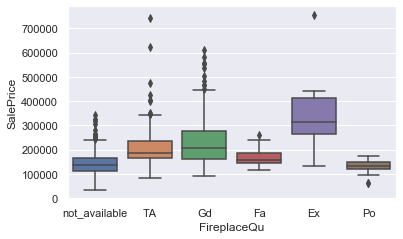

In [70]:
#Plotting the categorical variables related to FireplaceQu and checking correlation with SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = df)
#Clearly Fireplace presence drives Sale price to some extent

#### LotFrontage
* This column conveys the linear feet of street connected to property
* We know that is has 259 NA values.
* This column is of float type. Let’s checkout the corresponding data distribution.

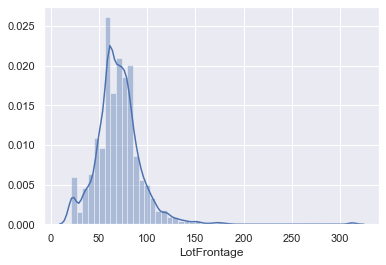

In [23]:
sns.distplot(df.LotFrontage)
plt.show()

* From the above plot, we may notice that there are quote a low outliers and hence the distribution of the data is right-skewed.
* Now since the data distribution is skewed, let’s replace NA values with median value of this column.

In [24]:
df.LotFrontage.replace(np.nan,df.LotFrontage.median(),inplace=True)
df.LotFrontage.isnull().sum()

0

#### garage_cols
* There are total 06 Garage related columns which conveys information as under:
* GarageYrBlt: Year garage was built
* GarageCond: Garage condition
* GarageType: Garage location
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageQual: Garage quality

In [25]:
garage_cols=['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual']

In [28]:
for i in garage_cols:
    print(i)
    print(df[i].isnull().sum())
    print()

GarageYrBlt
81

GarageCond
81

GarageType
81

GarageFinish
81

GarageCars
0

GarageQual
81



In [29]:
df.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

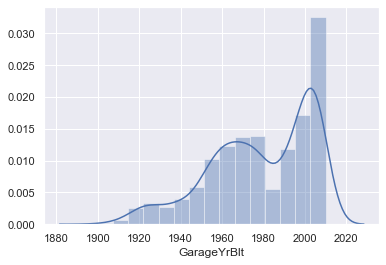

In [30]:
#check the data distribution of 'GarageYrBlt' column
sns.distplot(df.GarageYrBlt)
plt.show()

 imputation with mean or median (column being numeric) does not seem a viable option here as the data distribution of this column is not normal.

* Let’s get following driven metric out of GarageYrBlt column:
* 0: NA
* 1: GarageYrBlt<2000 (Old Garage)
* 2: GarageYrBlt>=2000 (New Garage)

In [31]:
#function to get the derived metric
def func(x):
    if x<2000:
        return 1
    if x>=2000:
        return 2
    if str(x)=='nan':
        return 0
df['GarageYrBlt']=df.GarageYrBlt.apply(func)

In [32]:
df.GarageYrBlt.value_counts()

1    977
2    402
0     81
Name: GarageYrBlt, dtype: int64

In [39]:
print(df.GarageCond.value_counts())
print("******************************************")
print(df.GarageType.value_counts())
print("******************************************")
print(df.GarageFinish.value_counts())
print("******************************************")
print(df.GarageQual.value_counts())

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
******************************************
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
******************************************
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
******************************************
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64


In [40]:
df.GarageCond.replace(np.nan,'No_Garage',inplace=True)
df.GarageType.replace(np.nan,'No_Garage',inplace=True)
df.GarageFinish.replace(np.nan,'No_Garage',inplace=True)
df.GarageQual.replace(np.nan,'No_Garage',inplace=True)

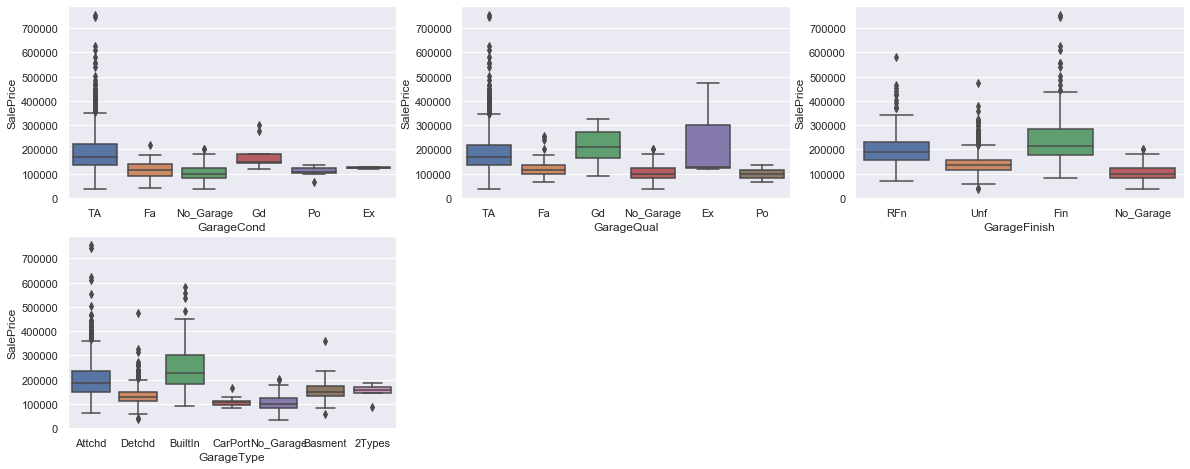

In [71]:
#Plotting the categorical variables related to Garage and checking correlation with SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df)

#### BsmtFinType2
* This column conveys the rating of basement finished area, if they are of multiple types.

In [41]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [42]:
df.BsmtFinType2.replace(np.nan,'No_Basement',inplace=True)

#### BsmtExposure
* This column refers to walkout or garden level walls.

In [43]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [44]:
df.BsmtExposure.replace(np.nan,'No_Basement',inplace=True)

#### BsmtFinType1
* This column conveys rating of basement finished area.

In [45]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [46]:
df.BsmtFinType1.replace(np.nan,'No_Basement',inplace=True)

#### BsmtCond
* This column evaluates the general condition of the basement.

In [47]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [48]:
df.BsmtCond.replace(np.nan,'No_Basement',inplace=True)

#### BsmtQual
* This columns evaluates the height of the basement.

In [49]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [50]:
df.BsmtQual.replace(np.nan,'No_Basement',inplace=True)

In [66]:
#Taking a deep dive into the Basement related attributes to understand the correlations
HouseAu_Basement=df[['BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtCond']]
HouseAu_Basement.head()
HouseAu_Basement.info()
##HouseAu['BsmtQual']=HouseAu['BsmtQual'].values.astype(np.int64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1460 non-null   object
 1   BsmtExposure  1460 non-null   object
 2   BsmtFinType1  1460 non-null   object
 3   BsmtFinType2  1460 non-null   object
 4   BsmtFinSF1    1460 non-null   int64 
 5   BsmtFinSF2    1460 non-null   int64 
 6   BsmtUnfSF     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   BsmtCond      1460 non-null   object
dtypes: int64(4), object(5)
memory usage: 102.8+ KB


<Figure size 1440x720 with 0 Axes>

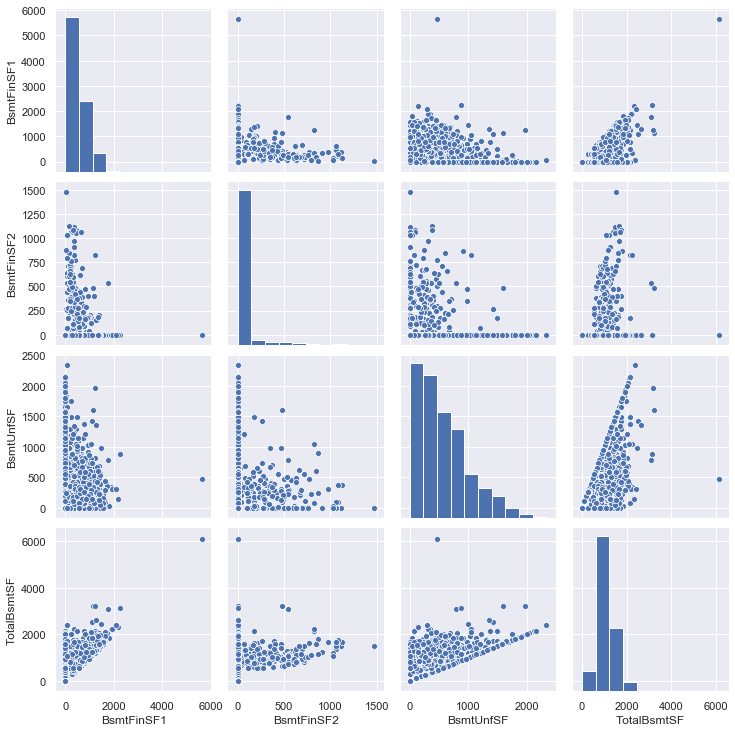

In [67]:
# pairwise scatter plot to explore Basement attributes

plt.figure(figsize=(20, 10))
sns.pairplot(HouseAu_Basement)
plt.show()

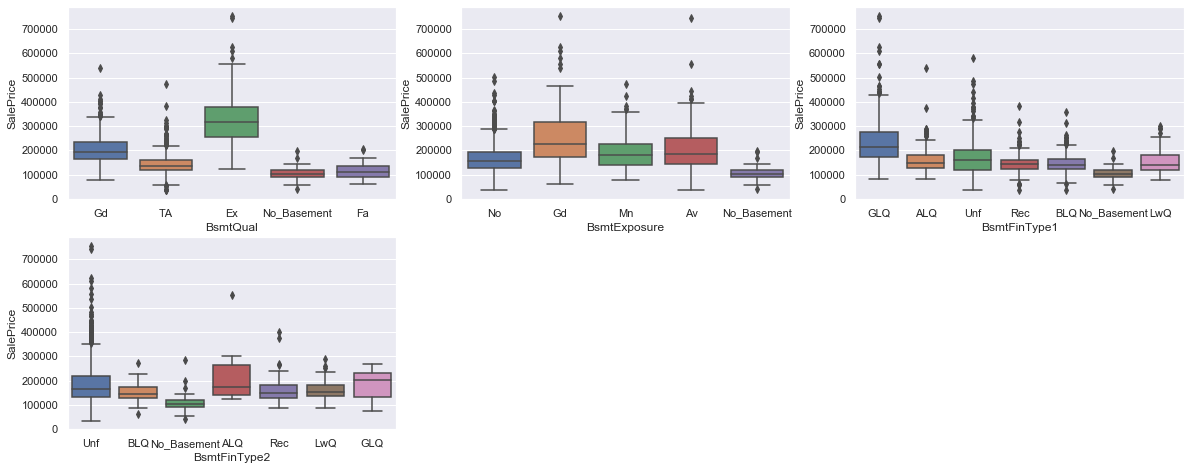

In [69]:
#Plotting the categorical variables related to Basement to find which ones have correlation and can be dropped
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = df)

In [61]:
df[(df.BsmtFinType2=='No_Basement')].shape

(38, 77)

In [62]:
df[(df.BsmtExposure=='No_Basement')].shape

(38, 77)

In [63]:
df[(df.BsmtFinType2=='No_Basement')].shape

(38, 77)

In [64]:
df[(df.BsmtFinType1=='No_Basement')].shape

(37, 77)

#### MasVnrType
* This column conveys masonry veneer type

In [51]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [52]:
df.MasVnrType.replace(np.nan,'None',inplace=True)

#### Electrical
* This column conveys the type of Electrical system that the properties have

In [53]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [54]:
df.Electrical.replace(np.nan,df.Electrical.mode()[0],inplace=True)

#### MasVnrArea
* This column says masonry veneer area in square feet

In [55]:
df.MasVnrArea.value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

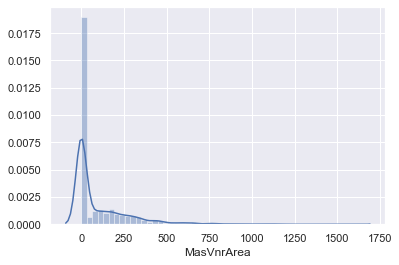

In [56]:
#check distribution plot
sns.distplot(df.MasVnrArea)
plt.show()

* We can replace ‘na’ by median value, as distribution seems skewed.

In [58]:
df.MasVnrArea.replace(np.nan,df.MasVnrArea.median(),inplace=True)

<Figure size 1440x720 with 0 Axes>

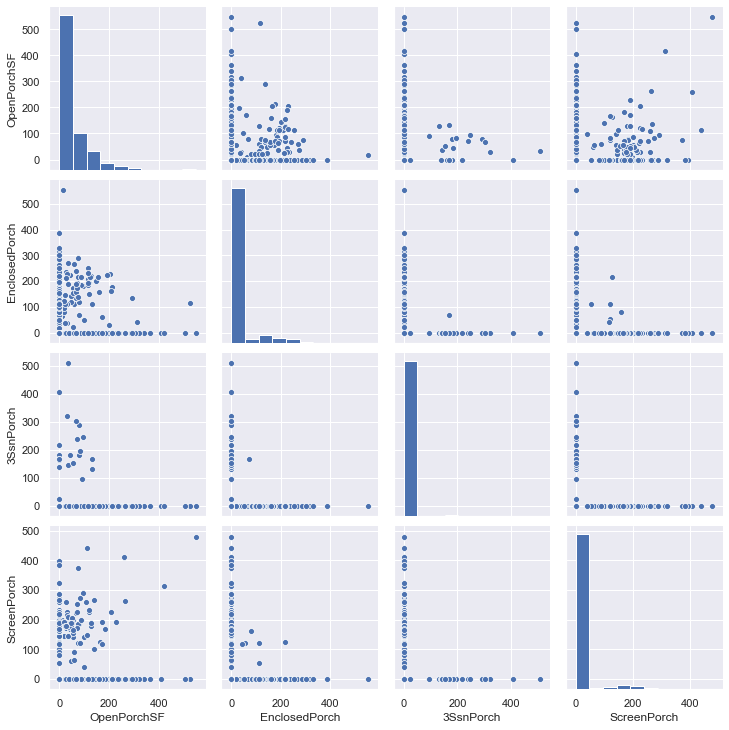

In [73]:
#Taking a deep dive into the Basement related attributes to understand the correlations
HouseAu_Porch=df[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']]

# pairwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(HouseAu_Porch)
plt.show()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Considering 10% as my threshold and dropping the column having more then the threshold

In [ ]:
df = df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'],axis='columns')